<a href="https://colab.research.google.com/github/rajjjxd/E-commerce_sentimental_analysis_and_PBI_Dashboard/blob/main/Women_Ecommerce_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df = df.rename(columns={'Unnamed: 0': 'S.no'})

In [ ]:
df.head()

,S.no,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
print(df.isnull().sum())

S.no                          0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [ ]:
df.dropna()

,S.no,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

S.no                       0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   S.no                     19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [ ]:
print(df.describe())

               S.no   Clothing ID           Age        Rating  \
count  19662.000000  19662.000000  19662.000000  19662.000000   
mean   11755.260655    921.297274     43.260808      4.183145   
std     6772.063092    200.227528     12.258122      1.112224   
min        2.000000      1.000000     18.000000      1.000000   
25%     5888.250000    861.000000     34.000000      4.000000   
50%    11749.500000    936.000000     41.000000      5.000000   
75%    17624.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     19662.000000             19662.000000  
mean          0.818177                 2.652477  
std           0.385708                 5.834285  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           

In [ ]:
print(df['Review Text'].isnull().sum())

0


In [ ]:
# Reset the index
df = df.reset_index(drop=True)

SENTIMENTAL ANALYSIS USING VADER

In [ ]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Function to get sentiment scores
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

In [ ]:
# Apply sentiment analysis to the Reviews column
df['sentiment_score'] = df['Review Text'].apply(get_sentiment)

In [ ]:
# Categorize sentiment
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

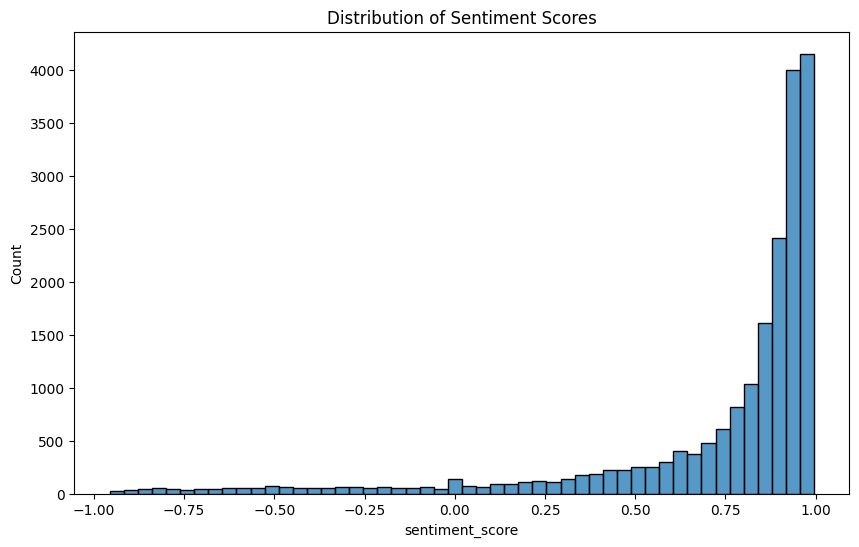

In [ ]:
# Plot distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=50)
plt.title('Distribution of Sentiment Scores')
plt.show()

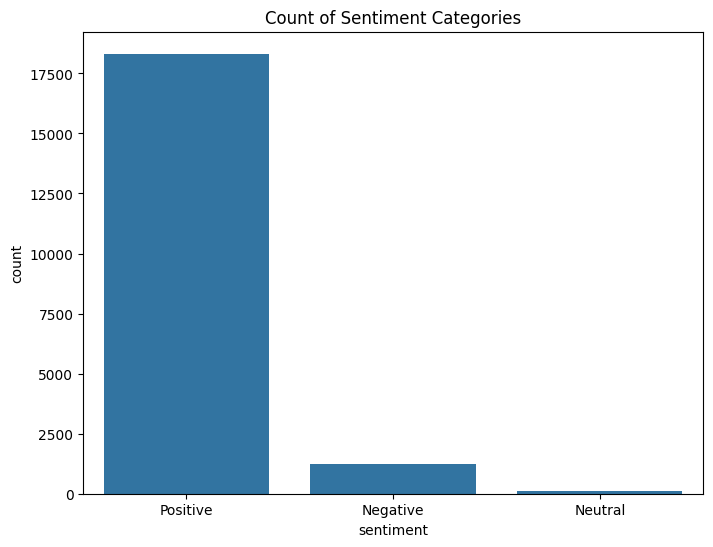

In [ ]:
# Plot count of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Count of Sentiment Categories')
plt.show()

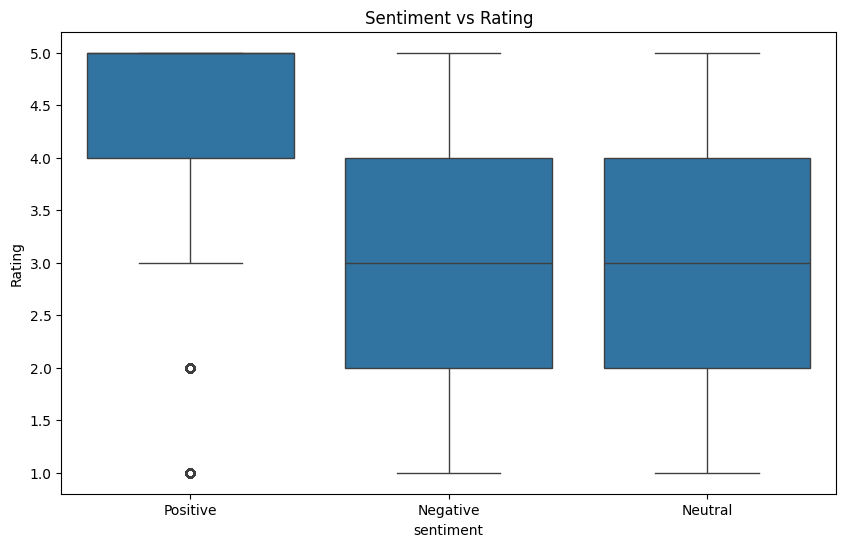

In [ ]:
# Compare sentiment with ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='Rating', data=df)
plt.title('Sentiment vs Rating')
plt.show()


In [ ]:

print(df[['Review Text', 'sentiment', 'sentiment_score']].sample(20))

                                             Review Text sentiment  \
4494   The lines on the dress are lovely. the materia...  Positive   
11953  The material was a little itchy in my opinion....  Positive   
617    It was cute. i didn't keep it because it wasn'...  Positive   
17614  This is a beautiful top which runs tts and arm...  Positive   
10727  I like the dress on line: color flowers, cut, ...  Positive   
16213  It is the cutest detailed little white top. i ...  Positive   
16236  Pretty disappointed in this sweater. should ha...  Negative   
13100  Where i live it's warm enough to wear this dre...  Positive   
15275  Probably should have returned this but it's ju...  Positive   
4408   This pants are very comfortable, and add a lit...  Positive   
8195   I've never bought a jumpsuit and loved this on...  Positive   
10262  What a great purchase (especially on sale!) as...  Positive   
15563  Wow, i wish this would have worked for me. the...  Positive   
4567   I ordered thi

In [ ]:
df.to_csv('sentiment_analysis_results.csv', index=False)

In [ ]:
print("Data exported to 'sentiment_analysis_results.csv'")

Data exported to 'sentiment_analysis_results.csv'
